# 함수형 API

-여러 개의 입력 값을 받을 때는 Sequential()모델로만 하기에는 한계가 있음  
-> 함수형 API 사용

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

seq_model  =Sequential()
seq_model.add(Dense(32,activation='relu',input_shape=(64,)))
seq_model.add(Dense(32,activation='relu'))
seq_model.add(Dense(10,activation='softmax'))

seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#함수형 api
input_tensor = Input(shape=(64,))
x = Dense(32,activation='relu')(input_tensor)
x = Dense(32,activation='relu')(x)
output_tensor = Dense(10,activation='softmax')(x)

model = Model(input_tensor,output_tensor)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


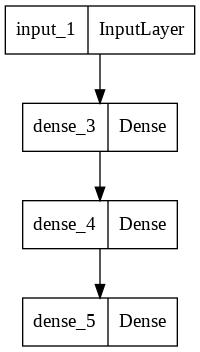

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

- Mnist 이미지 데이터 로드하고 벡터로 재구성
- 데이터에 모델을 맞추고
- 테스트 데이텅에서 모델 평가

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
inputs = keras.Input(shape=(784,),name='digit')
x = Dense(64,activation='relu',name='dense_1')(inputs)
x = Dense(64,activation='relu',name='dense_2')(x)
outputs = Dense(10,activation='softmax',name='predictions')(x)

model = Model(inputs=inputs,outputs=outputs)

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000,784).astype('float32')/ 255
x_test = x_test.reshape(10000,784).astype('float32')/255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

#-10000 뒤에서 만개까지
x_val = x_train[-10000:]
y_val = y_train[-10000:]
#처음부터 -10000개까지
x_train= x_train[:-10000]
y_train = y_train[:-10000]

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
a =[1,2,3,4,5]
print(a[-2:])
print(a[:-2])

[4, 5]
[1, 2, 3]


CategoricalCrossentropy vs SparseCategoricalCrossentropy
- 훈련 데이터의 label(target)이 one-hot vector 이면 CategoricalCrossentropy
- 훈련 데이터의 label(target)이 정수이면 SparseCategoricalCrossentropy


In [ ]:
#훈련구성
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])


In [ ]:
#모델 학습
history = model.fit(x_train,y_train,batch_size=64,epochs=2, validation_data =(x_val,y_val)
)

Epoch 1/2
782/782 [==============================] - 3s 3ms/step - loss: 0.3408 - sparse_categorical_accuracy: 0.9031 - val_loss: 0.2165 - val_sparse_categorical_accuracy: 0.9352
Epoch 2/2
782/782 [==============================] - 3s 3ms/step - loss: 0.1652 - sparse_categorical_accuracy: 0.9505 - val_loss: 0.1426 - val_sparse_categorical_accuracy: 0.9604


In [ ]:
results= model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1418 - sparse_categorical_accuracy: 0.9588


pg.57~59 연속형모델과 비교가능

## 다중 입력 모델

In [ ]:
#다중 입력 모델
from tensorflow.keras import layers
text_vacabulary_size=10000
question_vacabulary_size = 10000
answer_vacabulary_size=500

text_input = Input(shape=(None,),dtype='int32',name='text')
embedded_text = layers.Embedding(text_vacabulary_size,64)(text_input)
encoded_text = layers.LSTM(32)(embedded_text)
question_input = Input(shape=(None,),dtype='int32',name='question')
embedded_question = layers.Embedding(question_vacabulary_size,32)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

#axis= -1은 가장 낮은 차원 뒤쪽에서부터 시작,자료가 2차원이고 axis=-1 이면 1차원에서 붙이라는 의미
concatenated = layers.concatenate([encoded_text,encoded_question],axis=-1)

answer = layers.Dense(answer_vacabulary_size,activation='softmax')(concatenated)
#두개의 입력과 한 개의 출력
model= Model([text_input,question_input],answer)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])


[과제] 입력이 2개인 모델에 대하여 훈련을 수행하세요
- num_samples = 1000, max_length = 100

입력이 2개인 모델은 어떻게 훈련할까  
=> 넘파이 배열의 리스트를 주입하거나  
=> 입력 이름과 넘파이 배열로 이루어진 딕셔너리 모델의 입력으로 주입(입력 이름 설정했을 때 사용 가능)

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

num_samples = 1000
max_length = 100
text = np.random.randint(1,text_vacabulary_size,size=(num_samples,max_length))
question = np.random.randint(1,question_vacabulary_size,size=(num_samples,max_length))
answers = np.random.randint(0,answer_vacabulary_size,size=num_samples)

answers = to_categorical(answers)
#넘파이배열을 리스트로 주입
model.fit([text,question],answers,epochs=10,batch_size=128)
#딕셔너리 입력을 사용해 학습(입력 이름 지정했을 때만 사용 가능)
model.fit({'text':text,'question':question},answers,epochs=10,batch_size=128)

Epoch 1/10
8/8 [==============================] - 5s 135ms/step - loss: 6.2149 - acc: 0.0020
Epoch 2/10
8/8 [==============================] - 1s 134ms/step - loss: 6.1956 - acc: 0.0340
Epoch 3/10
8/8 [==============================] - 1s 136ms/step - loss: 6.1375 - acc: 0.0060
Epoch 4/10
8/8 [==============================] - 1s 132ms/step - loss: 6.0557 - acc: 0.0060
Epoch 5/10
8/8 [==============================] - 1s 130ms/step - loss: 5.9491 - acc: 0.0070
Epoch 6/10
8/8 [==============================] - 1s 127ms/step - loss: 5.8460 - acc: 0.0110
Epoch 7/10
8/8 [==============================] - 1s 132ms/step - loss: 5.7555 - acc: 0.0180
Epoch 8/10
8/8 [==============================] - 1s 132ms/step - loss: 5.6997 - acc: 0.0170
Epoch 9/10
8/8 [==============================] - 1s 132ms/step - loss: 5.6307 - acc: 0.0240
Epoch 10/10
8/8 [==============================] - 1s 132ms/step - loss: 5.5693 - acc: 0.0200
Epoch 1/10
8/8 [==============================] - 4s 131ms/step - los

## 다중 모델 출력

- 소셜 미디어에서 익명 사용자의 포스트를 입력받아 그 사람의 나이, 성별, 소득 수준 등을 예측 

In [ ]:
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D
vocabulary_size=50000
num_income_groups=10

posts_input = Input(shape=(None,),dtype='int32',name='posts')
embedded_posts = layers.Embedding(vocabulary_size,256)(posts_input)

x= layers.Conv1D(128,5,activation='relu')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x =layers.Conv1D(256,5,activation='relu')(x)
x =layers.Conv1D(256,5,activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x =layers.Conv1D(256,5,activation='relu')(x)
x =layers.Conv1D(256,5,activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128,activation='relu')(x)

#네트워크 출력마다 다른 손실 함수 지정해줘야됨
# 나이예측-스칼라 회귀, 성별 예측- 이진 클래스
age_prediction = layers.Dense(1,name='age')(x)
income_prediction = layers.Dense(num_incom_groups,activation='softmax',name='income')(x)
gender_prediction = layers.Dense(1,activation='sigmoid',name='gender')(x)

model =Model(posts_input,[age_prediction,income_prediction,gender_prediction])
model.compile(optimizer='rmsprop',loss={'age':'mse',
                                        'income':'categorical_crossentropy',
                                        'gender':'binary_crossentropy'},
              loss_weights={'age':0.25,
                            'income':1,
                            'gender':10.})

model.fit(posts_input,{'age':age_targets,
                 'income':income_targets,
                 'gender':gender_targets},epochs=10,batch_size=64)
